In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, BatchNormalization, Flatten, GlobalAvgPool2D

# flatten out as a vector
# this is a sequential approach
seq_model = keras.Sequential([
    Input(shape = (28,28,1)),
    Conv2D(32, (3,3), activation= 'relu'),  # there are 32 filters, which are 3x3 size
    Conv2D(64, (3,3), activation= 'relu'),
    MaxPool2D(),  # look for the best value
    BatchNormalization(momentum= 0.99),

    Conv2D(128, (3,3), activation= 'relu'),
    MaxPool2D(),
    BatchNormalization(), # normalise the batch to prevent vanishing exploding

    GlobalAvgPool2D(),
    Dense(64, activation= 'relu'),
    Dense(10, activation= 'softmax')
])

# functional approach
def functional_model():

    my_input = Input(shape = (28,28,1))
    x = Conv2D(32, (3,3), activation= 'relu')(my_input) # there are 32 filters, which are 3x3 size
    x = Conv2D(64, (3,3), activation= 'relu')(x)
    x = MaxPool2D()(x)  # look for the best value
    x = BatchNormalization(momentum= 0.99)(x)

    x = Conv2D(128, (3,3), activation= 'relu')(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x) # normalise the batch to prevent vanishing exploding

    x = GlobalAvgPool2D()(x)
    x = Dense(64, activation= 'relu')(x)
    x = Dense(10, activation= 'softmax')(x)

    model = keras.models.Model(inputs = my_input, outputs = x)

    return model

# inherit from a class
class MyCustomeModel(tf.keras.Model):
  def __init__(self):
    super().__init__()

    self.conv1 = Conv2D(32, (3,3), activation= 'relu')  # there are 32 filters, which are 3x3 size
    self.conv2 = Conv2D(64, (3,3), activation= 'relu')
    self.maxpool1 = MaxPool2D()  # look for the best value
    self.batchnorm1 = BatchNormalization(momentum= 0.99)

    self.conv3 = Conv2D(128, (3,3), activation= 'relu')
    self.maxpool2 = MaxPool2D()
    self.batchnorm2 = BatchNormalization() # normalise the batch to prevent vanishing exploding

    self.globalavgpool1 = GlobalAvgPool2D()
    self.dense1 = Dense(64, activation= 'relu')
    self.dense2 = Dense(10, activation= 'softmax')
  
  def call(self, my_input):
    x = self.conv1(my_input)
    x = self.conv2(x)
    x = self.maxpool1(x)
    x = self.batchnorm1(x)

    x = self.conv3(x)
    x = self.maxpool2(x)
    x = self.batchnorm2(x)

    x = self.globalavgpool1(x)
    x = self.dense1(x)
    x = self.dense2(x)

    return x


    



def display_some_examples(examples, labels):
    plt.figure(figsize = (10,10))
    for i in range(25):
        index = np.random.randint(0, examples.shape[0]-1) # lower end and higher end
        img = examples[index]
        label = labels[index]
        plt.subplot(5,5, i+1) # row, column, and index
        plt.title(str(label))
        plt.imshow(img, cmap = 'gray')
        plt.tight_layout()
        plt.grid(visible=None)
        plt.axis('off')

    plt.show()


if __name__ == '__main__':
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
    print("X_train.shape: ", X_train.shape)
    print("y_train.shape: ", y_train.shape)
    print("X_test.shape: ", X_test.shape)
    print("y_test.shape: ", y_test.shape)
    print(X_train[0].shape)
    # print(tf.version)

 
    X_train = X_train.astype('float32')/255
    X_test = X_test.astype('float32')/255

    X_train = np.expand_dims(X_train, axis =-1)
    X_test = np.expand_dims(X_test, axis=-1)
    # categorical will be used for one hot encoding
    # otherwise for categorical use sparse

    # Onehot encoding
    y_train = tf.keras.utils.to_categorical(y_train, 10) # how many classes are there
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    # replace seq_model with model
    model = functional_model()

    # using subclass
    model = MyCustomeModel()

    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    model.fit(X_train, y_train, batch_size = 64, epochs = 2, validation_split = 0.2)

    print(model.evaluate(X_test, y_test, batch_size = 64))




11501568/11490434 [==============================] - 0s 0us/step
X_train.shape:  (60000, 28, 28)
y_train.shape:  (60000,)
X_test.shape:  (10000, 28, 28)
y_test.shape:  (10000,)
(28, 28)
Epoch 1/2
750/750 [==============================] - 30s 24ms/step - loss: 0.2331 - accuracy: 0.9376 - val_loss: 0.1255 - val_accuracy: 0.9637
Epoch 2/2
157/157 [==============================] - 1s 7ms/step - loss: 0.0792 - accuracy: 0.9748
[0.0792427510023117, 0.9747999906539917]


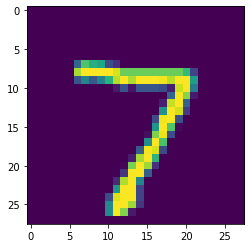

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
plt.imshow(X_test[0])


In [ ]:
! git clone https://github.com/dduygaucho/German-dataset.git

Cloning into 'German-dataset'...
remote: Enumerating objects: 51950, done.
remote: Counting objects: 100% (12695/12695), done.
remote: Compressing objects: 100% (12688/12688), done.
remote: Total 51950 (delta 8), reused 12693 (delta 6), pack-reused 39255
Receiving objects: 100% (51950/51950), 299.45 MiB | 13.82 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Checking out files: 100% (51887/51887), done.


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
os.chdir('German-dataset')

In [ ]:
os.getcwd()

'/content/German-dataset'

In [ ]:
os.mkdir('training_data')

In [ ]:
os.chdir("training_data")
os.mkdir('training')
os.mkdir('validation')

In [ ]:
import os
import glob
from sklearn.model_selection import train_test_split

import shutil

def split_data(path_to_data, path_to_save_train, path_to_save_val,  split_size = 0.1):
  folders = os.listdir(path_to_data)

  for folder in folders:

    full_path = os.path.join(path_to_data, folder) #  create a full path to the folder inside
    images_path = glob.glob(os.path.join(full_path, '*.png')) # find png files recursively in the full_path folder

    X_train, X_val = train_test_split(images_path, test_size = split_size)

    for x in X_train:
      path_to_folder = os.path.join(path_to_save_train, folder) # create a brand new folder in the new folder to prevent modifying raw files

      if not os.path.isdir(path_to_folder):
        os.makedirs(path_to_folder)
      
      shutil.copy(x, path_to_folder) # saving files into the new folder

    for x in X_val:
      path_to_folder = os.path.join(path_to_save_val, folder) # create a brand new folder in the new folder to prevent modifying raw files

      if not os.path.isdir(path_to_folder):
        os.makedirs(path_to_folder)
      
      shutil.copy(x, path_to_folder) # saving files into the new folder
      
if __name__ == '__main__':
  path_to_data = "/content/German-dataset/Train"
  path_to_save_train = "/content/German-dataset/training_data/training"
  path_to_save_val = "/content/German-dataset/training_data/validation" 
  split_data(path_to_data, path_to_save_train, path_to_save_val)


In [ ]:
import os
import csv
import glob
from sklearn.model_selection import train_test_split

import shutil
def order_test_set(path_to_images, path_to_csv):
  """
  path_to_images: direction to images 
  path_to_csv: the csv file that used for checking test set: test.csv
  Aim: want to organise the test folder exactly the same like in training_data/training or validation
  """
  try:
    with open (path_to_csv, 'r') as csvfile:
      reader = csv.reader(csvfile, delimiter = ',')

      for i, row in enumerate(reader):
        if i == 0:
          continue

        img_name = row[-1].replace('Test/', '')
        label = row[-2]

        path_to_folder = os.path.join(path_to_images, label)
        if not os.path.isdir(path_to_folder):
          os.makedirs(path_to_folder)

        img_full_path = os.path.join(path_to_images, img_name)
        shutil.move(img_full_path, path_to_folder)

  except:
    print('[INFO]: Error in reading csv file')

if __name__ == '__main__':
  path_to_images = "/content/German-dataset/Test"
  path_to_csv = "/content/German-dataset/Test.csv"
  order_test_set(path_to_images, path_to_csv)


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, BatchNormalization, Flatten, GlobalAvgPool2D
from tensorflow.keras import Model

# flatten out as a vector
# this is a sequential approach
seq_model = keras.Sequential([
    Input(shape = (28,28,1)),
    Conv2D(32, (3,3), activation= 'relu'),  # there are 32 filters, which are 3x3 size
    Conv2D(64, (3,3), activation= 'relu'),
    MaxPool2D(),  # look for the best value
    BatchNormalization(momentum= 0.99),

    Conv2D(128, (3,3), activation= 'relu'),
    MaxPool2D(),
    BatchNormalization(), # normalise the batch to prevent vanishing exploding

    GlobalAvgPool2D(),
    Dense(64, activation= 'relu'),
    Dense(10, activation= 'softmax')
])

# functional approach
def functional_model():

    my_input = Input(shape = (28,28,1))
    x = Conv2D(32, (3,3), activation= 'relu')(my_input) # there are 32 filters, which are 3x3 size
    x = Conv2D(64, (3,3), activation= 'relu')(x)
    x = MaxPool2D()(x)  # look for the best value
    x = BatchNormalization(momentum= 0.99)(x)

    x = Conv2D(128, (3,3), activation= 'relu')(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x) # normalise the batch to prevent vanishing exploding

    x = GlobalAvgPool2D()(x)
    x = Dense(64, activation= 'relu')(x)
    x = Dense(10, activation= 'softmax')(x)

    model = keras.models.Model(inputs = my_input, outputs = x)
    
    return model

# inherit from a class
class MyCustomeModel(tf.keras.Model):
  def __init__(self):
    super().__init__()

    self.conv1 = Conv2D(32, (3,3), activation= 'relu')  # there are 32 filters, which are 3x3 size
    self.conv2 = Conv2D(64, (3,3), activation= 'relu')
    self.maxpool1 = MaxPool2D()  # look for the best value
    self.batchnorm1 = BatchNormalization(momentum= 0.99)

    self.conv3 = Conv2D(128, (3,3), activation= 'relu')
    self.maxpool2 = MaxPool2D()
    self.batchnorm2 = BatchNormalization() # normalise the batch to prevent vanishing exploding

    self.globalavgpool1 = GlobalAvgPool2D()
    self.dense1 = Dense(64, activation= 'relu')
    self.dense2 = Dense(10, activation= 'softmax')
  
  def call(self, my_input):
    x = self.conv1(my_input)
    x = self.conv2(x)
    x = self.maxpool1(x)
    x = self.batchnorm1(x)

    x = self.conv3(x)
    x = self.maxpool2(x)
    x = self.batchnorm2(x)

    x = self.globalavgpool1(x)
    x = self.dense1(x)
    x = self.dense2(x)

    return x

def street_signs_model(number_classes):
  my_input = Input(shape = [60,60, 3]) # choose 60 as a mean of total number of images, typically choose mean/median of the image
  # 3 is because there are 3 layers: R,G,B

  x = Conv2D(32, (3,3), activation= 'relu')(my_input) # there are 32 filters, which are 3x3 size
  x = MaxPool2D()(x)  # look for the best value
  x = BatchNormalization(momentum= 0.99)(x)

  x = Conv2D(64, (3,3), activation= 'relu')(x)
  x = MaxPool2D()(x)
  x = BatchNormalization()(x) # normalise the batch to prevent vanishing exploding

  x = Conv2D(128, (3,3), activation= 'relu')(x)
  x = MaxPool2D()(x)
  x = BatchNormalization()(x) # normalise the batch to prevent vanishing exploding

  #x = Flatten()(x) # Flatten out as a 1d vector
  x = GlobalAvgPool2D()(x) # Output the last element of the previous BN/ either use flatten or globalavgpool
  x = Dense(128, activation= 'relu')(x) 
  x = Dense(number_classes, activation= 'softmax')(x)

  model = keras.models.Model(inputs = my_input, outputs = x)
  # model = Model(... )
  return model



    



def display_some_examples(examples, labels):
    plt.figure(figsize = (10,10))
    for i in range(25):
        index = np.random.randint(0, examples.shape[0]-1) # lower end and higher end
        img = examples[index]
        label = labels[index]
        plt.subplot(5,5, i+1) # row, column, and index
        plt.title(str(label))
        plt.imshow(img, cmap = 'gray')
        plt.tight_layout()
        plt.grid(visible=None)
        plt.axis('off')

    plt.show()


if __name__ == '__main__':
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
    print("X_train.shape: ", X_train.shape)
    print("y_train.shape: ", y_train.shape)
    print("X_test.shape: ", X_test.shape)
    print("y_test.shape: ", y_test.shape)
    print(X_train[0].shape)
    # print(tf.version)

 
    X_train = X_train.astype('float32')/255
    X_test = X_test.astype('float32')/255

    X_train = np.expand_dims(X_train, axis =-1)
    X_test = np.expand_dims(X_test, axis=-1)
    # categorical will be used for one hot encoding
    # otherwise for categorical use sparse

    # Onehot encoding
    # y_train = tf.keras.utils.to_categorical(y_train, 10) # how many classes are there
    # y_test = tf.keras.utils.to_categorical(y_test, 10)

    # replace seq_model with model
    model = functional_model()

    # using subclass
    model = MyCustomeModel()
    # model = street_signs_model(10)
    # sparse = categorical
    model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

    model.fit(X_train, y_train, batch_size = 64, epochs = 2, validation_split = 0.2)

    print(model.evaluate(X_test, y_test, batch_size = 64))




X_train.shape:  (60000, 28, 28)
y_train.shape:  (60000,)
X_test.shape:  (10000, 28, 28)
y_test.shape:  (10000,)
(28, 28)
Epoch 1/2
750/750 [==============================] - 14s 17ms/step - loss: 0.2355 - accuracy: 0.9378 - val_loss: 0.2823 - val_accuracy: 0.9034
Epoch 2/2
157/157 [==============================] - 1s 6ms/step - loss: 0.0877 - accuracy: 0.9709
[0.08771034330129623, 0.9708999991416931]


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping # stop the training if there is no improvement

def create_generators(batch_size, train_data_path, val_data_path, test_data_path):
  preprocessor = ImageDataGenerator(
      rescale = 1/255.                             # rescale data before putting in the machine learning model
      # rotation_range = 10 # (rotated by -10 to 10 degrees)
      # width_shift_range = 0.1 #  (shift the image 10% to left and right)
  )
  # should create 2 versions of preprocessor: train_processor and test_processor
  # test for real application, and train for some hyperparams to tune such as rotation_range

  train_generator = preprocessor.flow_from_directory(
      train_data_path,  # go in this folder and knows automatically that every subfolder in this folder belongs to a single class
      class_mode = 'categorical', # or sparse but for categorical it needs to be one-hot encoded
      target_size = (60,60), # all images are resized to 60, 60
      color_mode = 'rgb',
      shuffle = True, # each epoch, batch images will be shuffled so that order does not matter when training
      batch_size = batch_size

  )

  val_generator = preprocessor.flow_from_directory(
      val_data_path,  # go in this folder and knows automatically that every subfolder in this folder belongs to a single class
      class_mode = 'categorical', # or sparse but for categorical it needs to be one-hot encoded
      target_size = (60,60), # all images are resized to 60, 60
      color_mode = 'rgb',
      shuffle = False, # each epoch, batch images will be shuffled so that order does not matter when training
      batch_size = batch_size

  )

  test_generator = preprocessor.flow_from_directory(
      test_data_path,  # go in this folder and knows automatically that every subfolder in this folder belongs to a single class
      class_mode = 'categorical', # or sparse but for categorical it needs to be one-hot encoded
      target_size = (60,60), # all images are resized to 60, 60
      color_mode = 'rgb',
      shuffle = False, # no matter when testing or validating
      batch_size = batch_size
  )
  return train_generator, val_generator, test_generator

if __name__ == '__main__':
  path_to_train = "/content/German-dataset/training_data/training"
  path_to_val = "/content/German-dataset/training_data/validation"
  path_to_test = "/content/German-dataset/Test"
  batch_size = 64
  epochs = 15
  lr = learning_rate
  path_to_save_model = './Models'
  train_generator, val_generator, test_generator = create_generators(batch_size, path_to_train, path_to_val, path_to_test)
  number_classes = train_generator.num_classes
  TRAIN = False
  TEST = True
  if TRAIN:
    ckpt_saver = ModelCheckpoint(
        path_to_save_model,
        monitor = 'val_accuracy', # monitor this value
        mode = 'max', # achieve the highest and save
        save_best_only = True, # only save the best model only
        save_freq = 'epoch',
        verbose = 1
    )

    early_stop = EarlyStopping(
        monitor = 'val_accuracy', 
        patience = 10
    )

    model = street_signs_model(number_classes)
    # optimizer = tf.keras.optimizers.SGD(learning_rate = lr, amsgrad = True) #grad: better
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    model.fit(train_generator, epochs= epochs, batch_size= batch_size,
              validation_data = val_generator,
              callbacks = [ckpt_saver, early_stop])
    
  if TEST:
    model = tf.keras.models.load_model('./Models')
    model.summary()
    print("Evaluating the validation set")
    model.evaluate(val_generator)
    print("Evaluating the test set")
    model.evaluate(test_generator)


# Parameters to change to improve: epochs, batch_size, architecture of layers
# Can add other things to the preprocessing: data augmentation techniques
# changing the learning rate from the optimizer

Found 38791 images belonging to 43 classes.
Found 7424 images belonging to 43 classes.
Found 12630 images belonging to 43 classes.
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 60, 60, 3)]       0         
                                                                 
 conv2d_39 (Conv2D)          (None, 58, 58, 32)        896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 29, 29, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_28 (Bat  (None, 29, 29, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_40 (Conv2D)          (None, 27, 27, 64)        18496

In [ ]:
os.getcwd()

'/content/German-dataset'

In [ ]:
def predict_with_model(model, imgpath):
  image = tf.io.read_file(imgpath)
  image = tf.image.decode_png(image, channels = 3)
  image = tf.image.convert_image_dtype(image, dtype = tf.float32)
  image = tf.image.resize(image, [60,60]) # now becomes (60,60,3)
  image = tf.expand_dims(image, axis = 0) # now becomes (1,60,60,3)
  # note that this is the same as the output shape of inputlayer

  predictions = model.predict(image) # output a list of results[0.00005, ..., 0.99]
  prediction = np.argmax(predictions)

  return prediction 

if __name__ =='__main__':
  img_path = "/content/German-dataset/Test/2/00092.png"
  img_path = "/content/German-dataset/Test/0/00807.png"
  model = tf.keras.models.load_model('./Models')
  prediction = predict_with_model(model, img_path)
  print("Prediction is", prediction)

Prediction is 0
